In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
!python -m pip install numpy matplotlib imageio

# import libraries
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imageio

# set figure size
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['font.size'] = 10
%config InlineBackend.figure_format = 'retina'

In [10]:
from IPython.display import display_html, HTML

display_html(HTML('''
<style type="text/css">
  .instruction { background-color: yellow; font-weight:bold; padding: 3px; }
</style>
'''));

In [12]:
import kmeans
import gmm

# should print "Hello from ..."
kmeans.hello()
gmm.hello()

Hello from kmeans.py!
Hello from gmm.py!


In [13]:
img_small = np.array(imageio.v3.imread('data/mandrill-small.tiff')) # 128 x 128 x 3
#plt.imshow(img_small)
img_small.shape

(128, 128, 3)

In [14]:
img_large = np.array(imageio.v3.imread('data/mandrill-large.tiff')) # 512 x 512 x 3
plt.imshow(img_large)
img_large.shape

(512, 512, 3)

Note that the small image becomes our training data and the large image our test data.

In [15]:
ndim = img_small.shape[-1]
train_data = img_small.reshape(-1, ndim).astype(float)
test_data = img_large.reshape(-1, ndim).astype(float)

In [16]:
%%time

# K-means
num_centroid = 16
initial_centroid_indices = [
    16141, 15086, 15419,  3018,  5103,  6545, 15299, 11460,
    1006,  11603, 11095,  6257, 15220, 10027, 11411, 13403,
]
initial_centroids = train_data[initial_centroid_indices, :]
centroids = kmeans.train_kmeans(train_data, initial_centroids)

Iteration  0: SSD = 11603434.32
Iteration  1: SSD = 9897886.17
Iteration  2: SSD = 9464080.82
Iteration  3: SSD = 9252389.35
Iteration  4: SSD = 9113512.30
Iteration  5: SSD = 9002224.95
Iteration  6: SSD = 8901174.28
Iteration  7: SSD = 8801526.11
Iteration  8: SSD = 8698793.83
Iteration  9: SSD = 8576626.72
Iteration 10: SSD = 8367667.28
Iteration 11: SSD = 7951959.90
Iteration 12: SSD = 7808243.53
Iteration 13: SSD = 7732071.57
Iteration 14: SSD = 7680840.69
Iteration 15: SSD = 7645392.93
Iteration 16: SSD = 7621739.04
Iteration 17: SSD = 7605292.11
Iteration 18: SSD = 7594104.30
Iteration 19: SSD = 7586447.74
Iteration 20: SSD = 7580773.56
Iteration 21: SSD = 7576144.47
Iteration 22: SSD = 7573816.39
Iteration 23: SSD = 7571899.36
Iteration 24: SSD = 7570338.72
Iteration 25: SSD = 7568853.15
Iteration 26: SSD = 7567538.21
Iteration 27: SSD = 7566197.82
Iteration 28: SSD = 7564849.65
Iteration 29: SSD = 7563424.86
Iteration 30: SSD = 7562154.86
Iteration 31: SSD = 7561255.38
Iterati

In [17]:
print(centroids)

[[179.72435233 170.3492228  165.17305699]
 [141.0414866  137.14001729  84.05358686]
 [172.89962825 105.05204461  42.01115242]
 [ 80.97386018  87.7118541   69.14711246]
 [220.79384203 103.16064257 100.38286479]
 [ 90.53689567 110.05258694 109.04495335]
 [203.72891566 168.82329317  75.2248996 ]
 [238.20445177  77.47238252  47.6801319 ]
 [118.34352159 132.94352159 118.11893688]
 [116.56712963 182.53125    227.14699074]
 [ 96.48863636 138.66818182 176.69318182]
 [161.34068844 161.31067961 115.17563989]
 [108.98795181 111.48058902  76.854083  ]
 [157.63301141 192.64793679 221.53643547]
 [ 58.07207207  56.59259259  44.83383383]
 [139.46262093 155.34212841 146.54617414]]


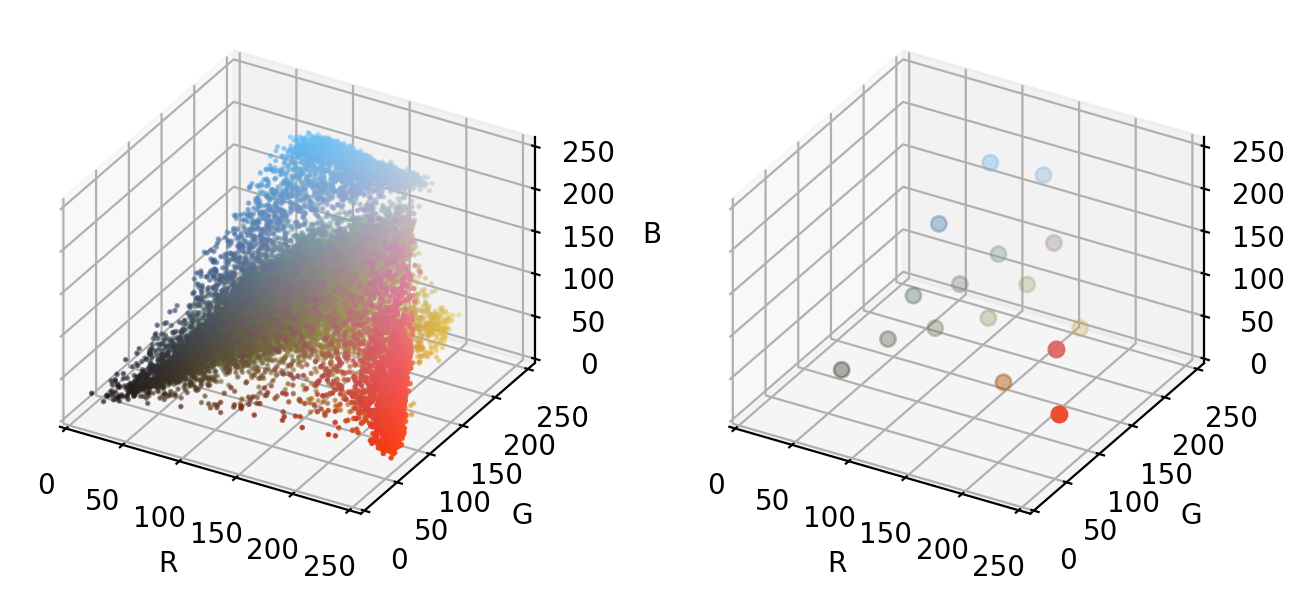

In [18]:
def visualize_3d(data, clusters):
    fig, axes = plt.subplots(1, 2, figsize=(7, 3), subplot_kw={'projection': '3d', 'proj_type': 'ortho'})

    # Data points
    axes[0].scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, :] / 255.0, s=1.0)
    axes[0].set(xlabel="R", ylabel="G", zlabel="B");
    axes[0].set(xlim=(0,255), ylim=(0,255), zlim=(0,255))
    
    # Cluster centroids
    axes[1].scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c=clusters[:, :] / 255.0, s=30)
    axes[1].set(xlabel="R", ylabel="G", zlabel="B");
    axes[1].set(xlim=(0,255), ylim=(0,255), zlim=(0,255))

    fig.tight_layout()
    return fig, axes


def animate(fig, axes):
    from IPython.display import HTML
    import matplotlib.animation

    num_frames = 50
    def animate_fn(i):
        print(f'#{i}', end='\n' if (i + 1) % 10 == 0 else ' ', flush=True)
        axes[0].view_init(30, np.linspace(-179, 179, num_frames)[i])
        axes[1].view_init(30, np.linspace(-179, 179, num_frames)[i])

    anim = matplotlib.animation.FuncAnimation(fig, animate_fn, frames=num_frames, interval=200)
    return HTML(anim.to_html5_video())


fig, axes = visualize_3d(train_data, centroids)

Or as an animation: (Warning: this is pretty slow, so feel free to skip if it's time consuming)

In [19]:
import sys
sys.path.append('C:\\Users\\lvyiw\Downloads\\fmpeg-2025-03-13-git-958c46800e-full_build\\ffmpeg\\bin')

In [20]:
sys.path

['/Users/admin/algorithms/ML_algos',
 '/Users/admin/algorithms/python_or-tools',
 '/Users/admin/.vscode/extensions/ms-toolsai.jupyter-2022.4.1021342353/pythonFiles',
 '/Users/admin/.vscode/extensions/ms-toolsai.jupyter-2022.4.1021342353/pythonFiles/lib/python',
 '/Users/admin/anaconda3/lib/python311.zip',
 '/Users/admin/anaconda3/lib/python3.11',
 '/Users/admin/anaconda3/lib/python3.11/lib-dynload',
 '',
 '/Users/admin/anaconda3/lib/python3.11/site-packages',
 '/Users/admin/anaconda3/lib/python3.11/site-packages/aeosa',
 'C:\\Users\\lvyiw\\Downloads\\fmpeg-2025-03-13-git-958c46800e-full_build\\ffmpeg\\bin']

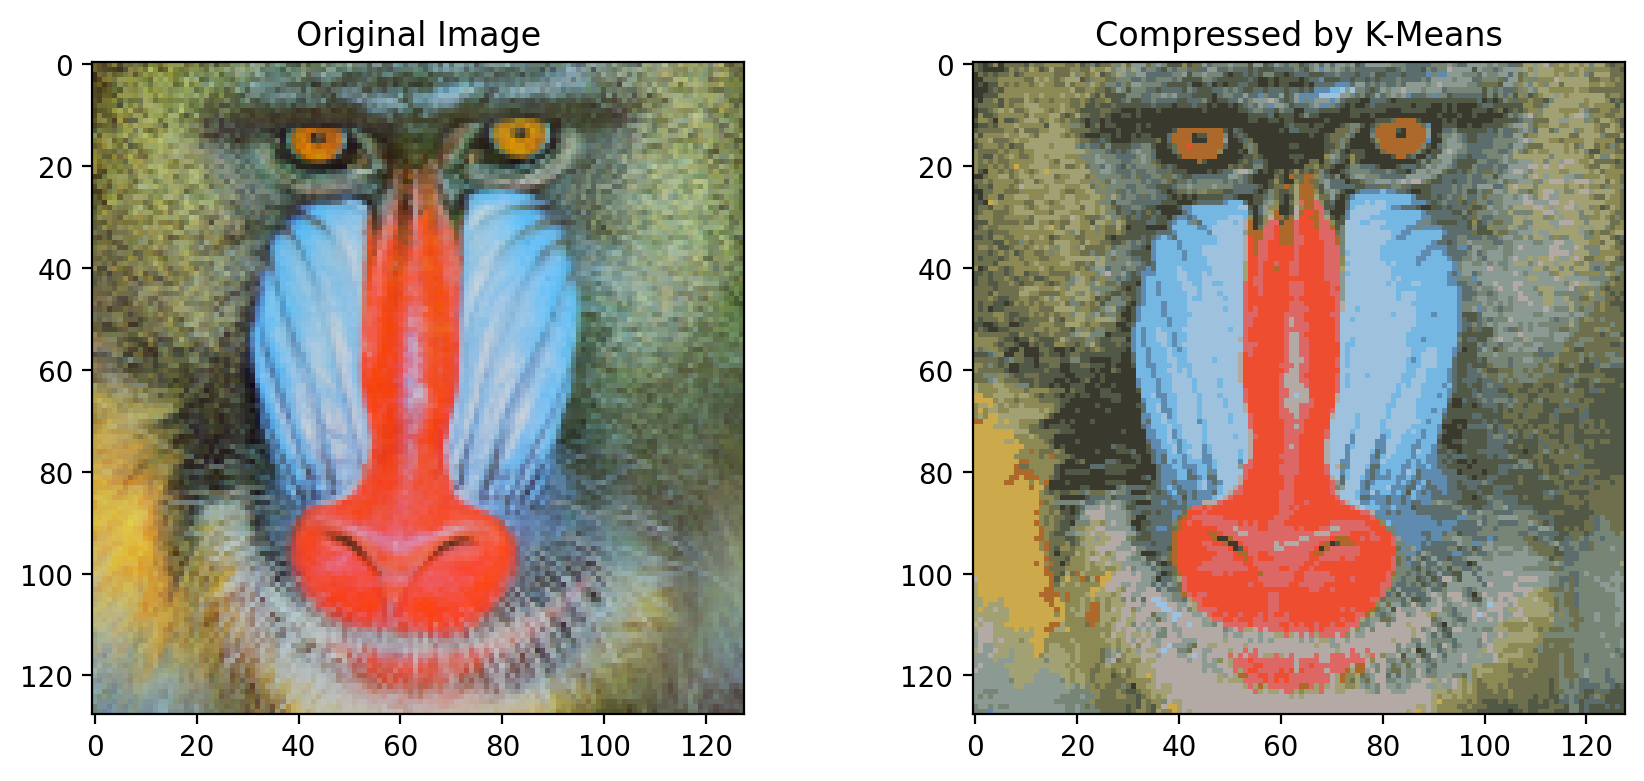

In [21]:
img_compressed = kmeans.compress_image(img_small, centroids)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_small)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed)
axes[1].set_title("Compressed by K-Means")
fig.tight_layout()

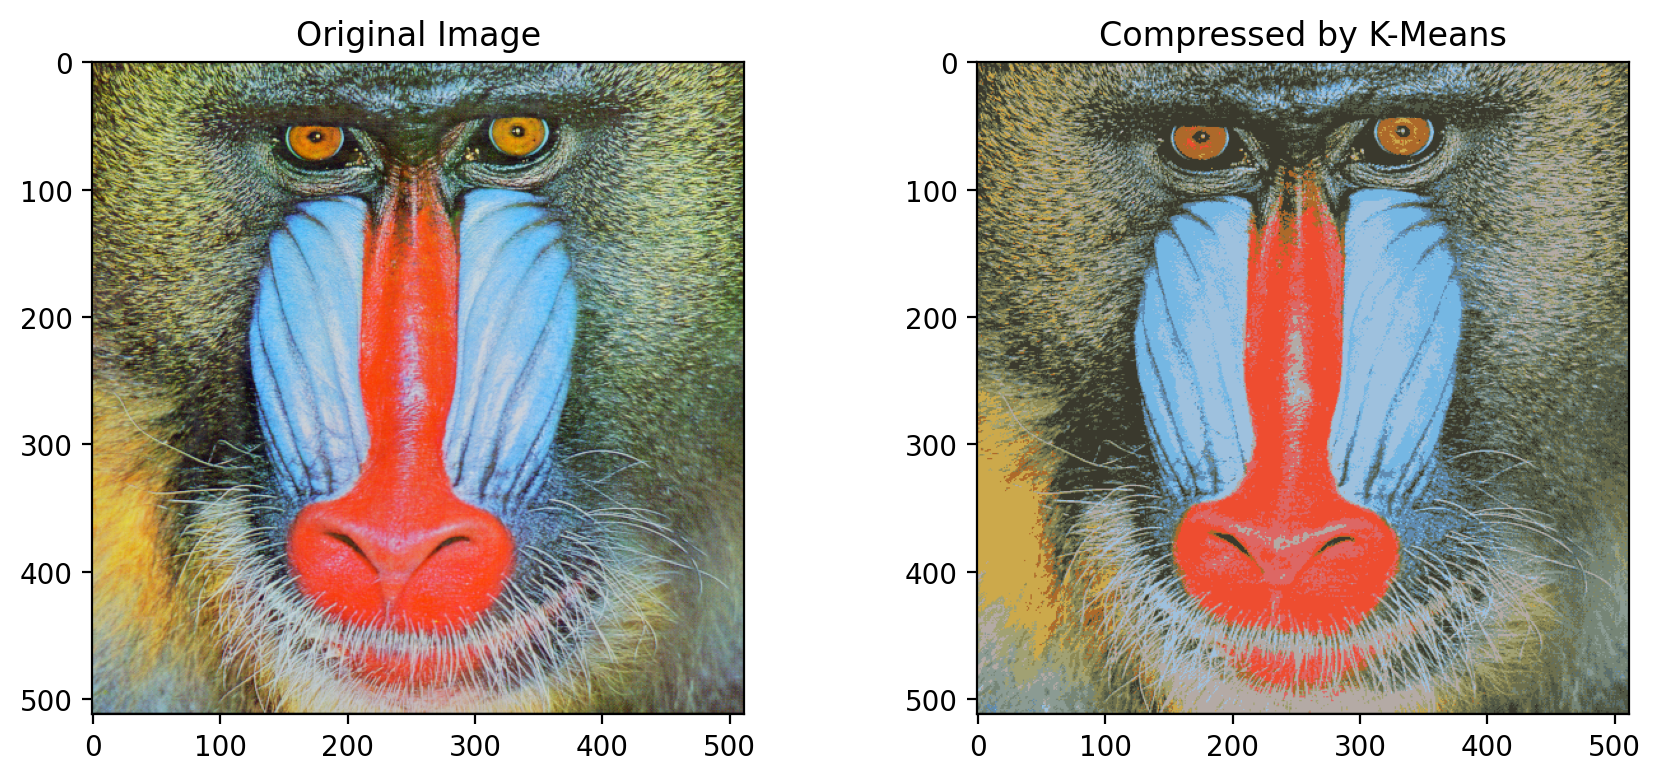

In [22]:
img_compressed = kmeans.compress_image(img_large, centroids)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_large)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed)
axes[1].set_title("Compressed by K-Means")
fig.tight_layout()

In [23]:
# ~~START DELETE~~
kmeans.euclidean_distance(img_compressed, img_large).mean()
# ~~END DELETE~~

14.60802961518135

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [24]:
# Initialize pi, mu, sigmanum_centroid = 5
initial_mu_indices = [16041, 15086, 15419,  3010,  5845]
num_mixtures = 5

init_pi = np.ones((num_mixtures)) / num_mixtures
init_mu = train_data[initial_mu_indices, :]
init_sigma = np.tile(np.identity(ndim), [num_mixtures, 1, 1]) * 1000.

gmm_model = gmm.train_gmm(train_data, init_pi, init_mu, init_sigma)
pi, mu, sigma = gmm_model

assert pi.shape == (5, )
assert mu.shape == (5, 3)
assert sigma.shape == (5, 3, 3)

-1.704192342799616e-13
-1.564304241696846e-13
-1.7719159473017503e-13
-1.8607337892717629e-13
-1.8240964294591327e-13
-1.7841284005726266e-13
-1.841859997853135e-13
-1.837419105754634e-13
-1.894040480010517e-13
-1.9584334154387761e-13
-1.9484414082171497e-13
-1.992850329202156e-13
-2.156053113822054e-13
-1.9706458687096529e-13
-1.8829382497642655e-13
-1.8740564655672642e-13
-1.9961809982760315e-13
-1.8074430840897548e-13
-1.9373391779708982e-13
-1.9517720772910252e-13
-1.978417429882029e-13
-2.0738966099997924e-13
-1.9162449405030202e-13
-2.070565940925917e-13
-2.183808689437683e-13
-2.015054789694659e-13
-1.9251267247000214e-13
-2.0827783941967937e-13
-2.0305979120394113e-13
-1.9384494009955233e-13
-2.0861090632706691e-13
-2.0883295093199195e-13
-1.6331380692236053e-13
-1.9761969838327786e-13
-2.0294876890147862e-13
-1.9373391779708982e-13
-2.128297538206425e-13
-2.0050627824730327e-13
-2.1094237467877974e-13
-1.8196555373606316e-13
-1.9484414082171497e-13
-2.0294876890147862e-13
-1.9

You can print out the model parameters:

In [25]:
np.set_printoptions(precision=2)

print(f"{pi = }")
print(f"{mu = }")
print(f"{sigma = }")

pi = array([0.13, 0.43, 0.11, 0.21, 0.11])
mu = array([[180.22, 149.48, 116.78],
       [125.08, 136.46, 114.67],
       [233.67,  86.85,  67.54],
       [ 81.61,  89.01,  69.69],
       [140.02, 189.46, 225.51]])
sigma = array([[[ 521.36,  290.61, -210.66],
        [ 290.61, 1047.03,  842.88],
        [-210.66,  842.88, 2511.74]],

       [[ 742.09,  526.24,   40.68],
        [ 526.24,  607.66,  454.3 ],
        [  40.68,  454.3 , 1226.68]],

       [[ 129.72, -108.61, -238.98],
        [-108.61,  259.27,  460.1 ],
        [-238.98,  460.1 , 1035.17]],

       [[ 459.17,  518.45,  324.74],
        [ 518.45,  692.35,  486.85],
        [ 324.74,  486.85,  463.54]],

       [[ 612.96,  146.43,  -90.39],
        [ 146.43,   89.24,   32.62],
        [ -90.39,   32.62,   82.26]]])


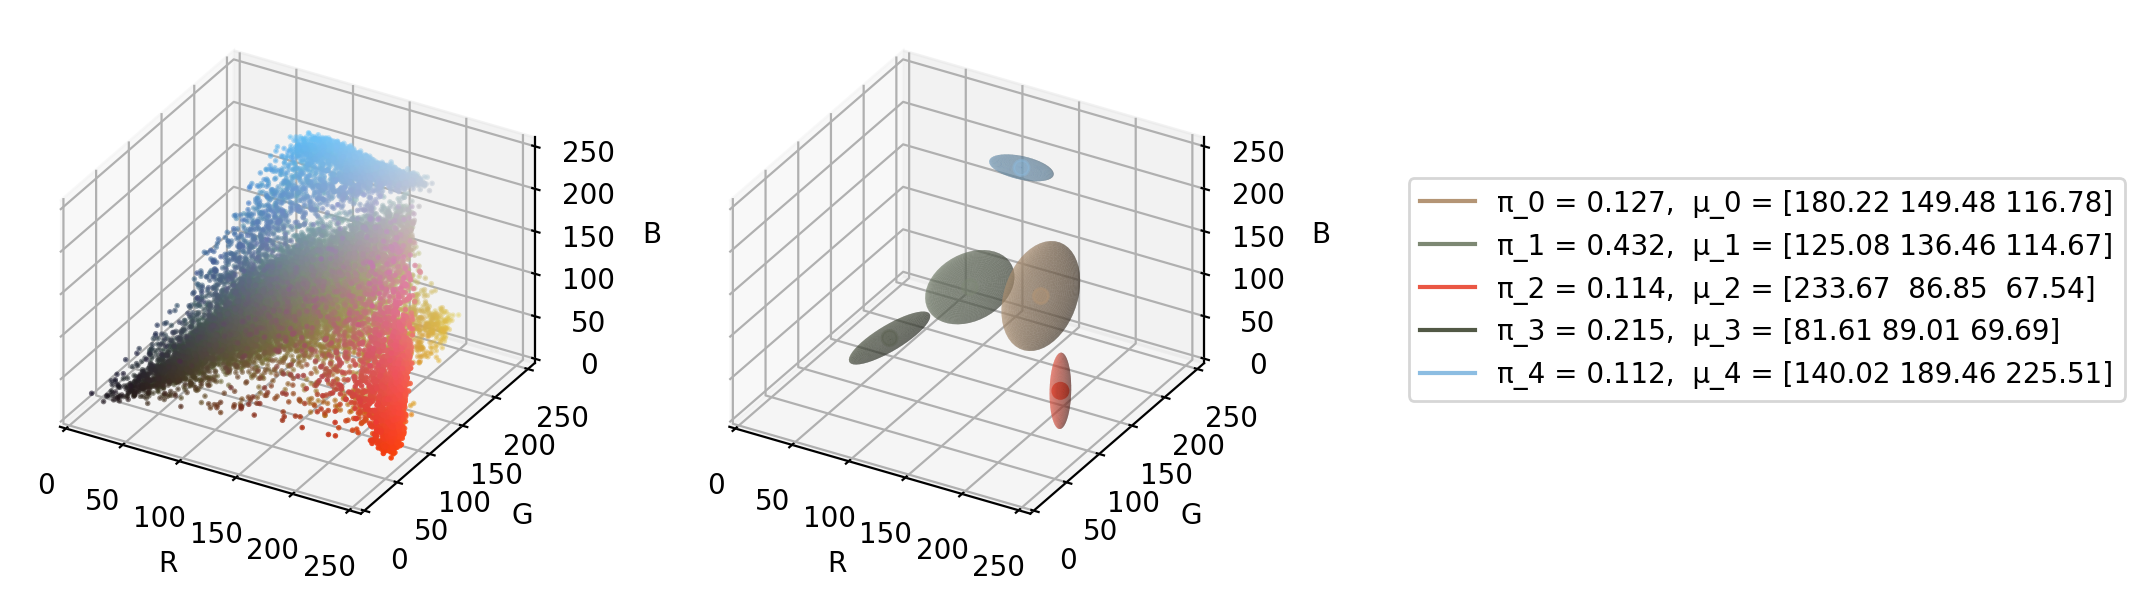

In [26]:
fig, axes = visualize_3d(train_data, mu)
fig.legend(
    [matplotlib.lines.Line2D([0], [0], color=mu_k/255.0) for mu_k in list(mu)],
    [f"π_{k} = {pi[k]:.3f},  μ_{k} = {mu[k]}" for k in range(mu.shape[0])],
    loc='center left', bbox_to_anchor=(1.05, 0.5)
)

for k in range(mu.shape[0]):
    covariance = sigma[k]
    
    # Use eigendecomposition to draw the 3D ellipsoid
    U, S, V = np.linalg.svd(covariance)
    u = np.linspace(0.0, 2.0 * np.pi, 50)
    v = np.linspace(0.0, np.pi, 50)
    # x, y, z on the principle axes with radius being sqrt{eigenvalue}
    x = (np.sqrt(S[0])) * np.outer(np.cos(u), np.sin(v))
    y = (np.sqrt(S[1])) * np.outer(np.sin(u), np.sin(v))
    z = (np.sqrt(S[2])) * np.outer(np.ones_like(u), np.cos(v))
    # Rotation
    xyz = np.stack([x, y, z], axis=2) @ U.T  # [50, 50, 3] * [3, 3]
    # Translation (centered at mu[k])
    xyz += mu[k, :][np.newaxis, np.newaxis, :]
    axes[1].plot_surface(xyz[:, :, 0], xyz[:, :, 1], xyz[:, :, 2], 
                         shade=True, alpha=0.5, color=mu[k] / 255.0)

## Test: Image Compression

Now we will apply the clustering result to the test image.

<span class="instruction">Implement a function `gmm.compress_image()`</span> which takes a RGB image and a K-means clustering result as input, and returns a compressed image by replacing each pixel with the mean value of the closest cluster (or with the maximum probability). Please add additional cells to compute and report the mean pixel error between the original and compressed image.

In [28]:
img_compressed = gmm.compress_image(img_large, gmm_model)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_large)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed)
axes[1].set_title("Compressed by GMM (hard assignment); K=5")
fig.tight_layout()

In [27]:

kmeans.euclidean_distance(img_compressed, img_large).mean()


14.60802961518135

In [35]:
# Initialize pi, mu, sigma (K = 16)
initial_mu_indices = np.random.RandomState(545).choice(train_data.shape[0], size=16, replace=False)

init_pi = np.ones(len(initial_mu_indices)) / num_mixtures
init_mu = train_data[initial_mu_indices, :]
init_sigma = np.tile(np.identity(ndim), [len(initial_mu_indices), 1, 1]) * 1000.

gmm_model_16 = gmm.train_gmm(train_data, init_pi, init_mu, init_sigma)

In [36]:
img_compressed_16 = gmm.compress_image(img_large, gmm_model_16)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_large)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed_16)
axes[1].set_title("Compressed by GMM (hard assignment); K=16")
fig.tight_layout()